## CIFAR-10 UAP - Evaluation
We show examples of the following:
1. Evaluation on clean datasets (train, test)
2. Evaluation with chess noise pattern
3. Loading and evaluation on pre-computed UAP

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import torch

sys.path.append(os.path.realpath('..'))

from utils import loader_cifar, model_cifar, evaluate

dir_data = '/data/cifar10'
dir_uap = '../uaps/cifar10/'

testloader = loader_cifar(dir_data = dir_data, train = False)
trainloader = loader_cifar(dir_data = dir_data, train = True)

Files already downloaded and verified
Files already downloaded and verified


In [2]:
# load model
model, best_acc = model_cifar('resnet18', ckpt_path = '../resnet18.pth')
print(best_acc)

94.02


## 1. Clean

In [3]:
_, _, _, _, outputs, labels = evaluate(model, trainloader, uap = None)
print('Train accuracy:', sum(outputs == labels) / len(labels))

Train accuracy: 0.99598


In [4]:
_, _, _, _, outputs, labels = evaluate(model, testloader, uap = None)
print('Test accuracy:', sum(outputs == labels) / len(labels))

Test accuracy: 0.9402


## 2. Chessboard pattern

In [5]:
# load pattern
uap = torch.load(dir_uap + 'chess.pth')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


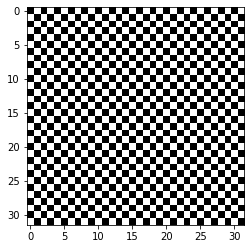

In [6]:
# visualize chessboard
plt.imshow(np.transpose(uap, (1, 2, 0)))

In [7]:
# evaluate
eps = 10 / 255
_, _, _, _, outputs, labels = evaluate(model, testloader, uap = uap * eps)
print('Accuracy:', sum(outputs == labels) / len(labels))

Accuracy: 0.1431


(array([1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
        1000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

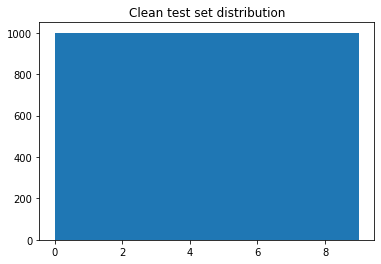

In [8]:
plt.title('Clean test set distribution')
plt.hist(labels)

(array([2.197e+03, 2.480e+02, 6.300e+01, 1.050e+02, 0.000e+00, 0.000e+00,
        2.300e+01, 1.000e+00, 1.530e+02, 7.210e+03]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

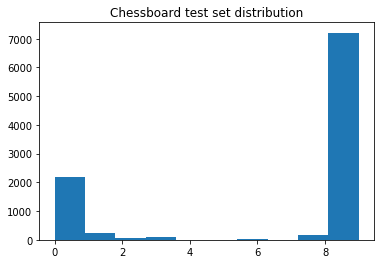

In [9]:
# plot histogram
plt.title('Chessboard test set distribution')
plt.hist(outputs)

## 3. Pre-computed UAP

In [10]:
# load UAP targeting class 4 with eps = 10
y_target = 4
eps = 10
uap = torch.load(dir_uap + 'sgd-tgt%i-eps%i.pth' % (y_target, eps))

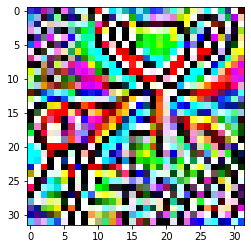

In [11]:
# visualize UAP
uap_max = torch.max(uap)
plt.imshow(np.transpose(((uap / uap_max) + 1) / 2, (1, 2, 0)))

In [12]:
# evaluate
_, _, _, _, outputs, labels = evaluate(model, testloader, uap = uap)
print('Accuracy:', sum(outputs == labels) / len(labels))
print('Targeted success rate:', sum(outputs == y_target) / len(labels))

Accuracy: 0.3483
Targeted success rate: 0.7257


(array([ 188.,  592.,  196.,  103., 7257.,  160.,  384.,  311.,  185.,
         624.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

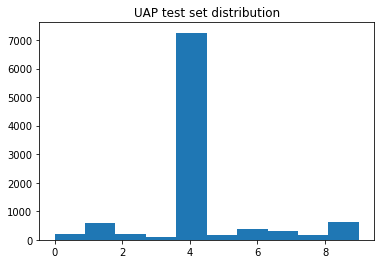

In [13]:
# plot histogram
plt.title('UAP test set distribution')
plt.hist(outputs)